In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import json

In [2]:
#Variables for the regared measures
measure_classification = ":balanced_accuracy"
measure_regression = ":rooted_mean_squared_error"

In [3]:
file_path = os.path.join(os.getcwd(), "data")
df = pd.read_csv(os.path.join(file_path,"datasetData.csv"))
runtime_dataset = pd.read_csv(os.path.join(file_path, "runtimeDataset.csv"))

with open(os.path.join(file_path , "runtime_prediction_parameters.json"), "r") as f:
    parameter = json.load(f)

groups = df.groupby(["task"])
runtime_groups = runtime_dataset.groupby(["task"])

In [4]:
def plot(title: str, x_label: str, y_label: str, title_legend: str, bbox=(0.95, 1) ):
    """sets the parameters for the plot

    Args:
        title (str): the title of the plot
        x_label (str): the x label of the plot
        y_label (str): the y label of the plot
        title_legend (str): the name of the legend
        bbox (tuple, optional): the size of the legend. Defaults to (0.95, 1).
    """
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
    plt.title(title)
    plt.legend(title=title_legend, bbox_to_anchor=bbox, loc="upper left")
    plt.show()

This section generates plots for evey AutoMl to descibe the relation between the relative balanced accuracy / rmse and the size of the dataset

C:\Users\pfriehe\AppData\Local\Temp\ipykernel_24880\2206077629.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group in groups:
C:\Users\pfriehe\AppData\Local\Temp\ipykernel_24880\2206077629.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for automl in automls:


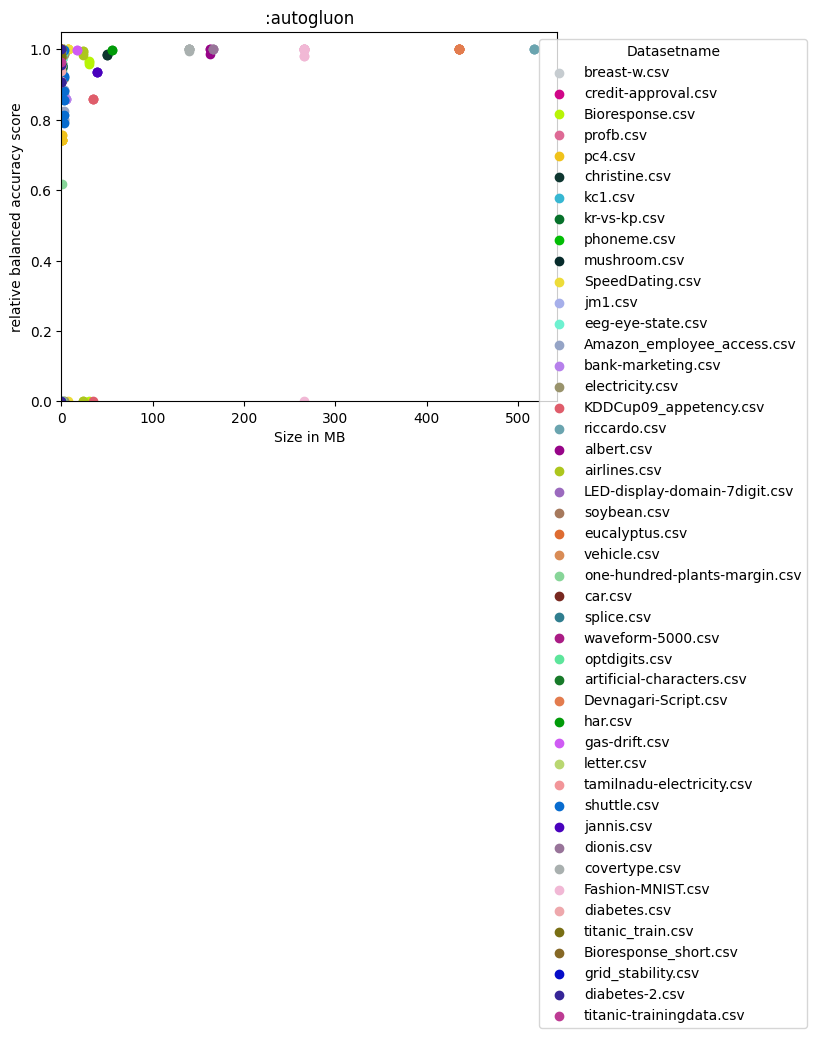

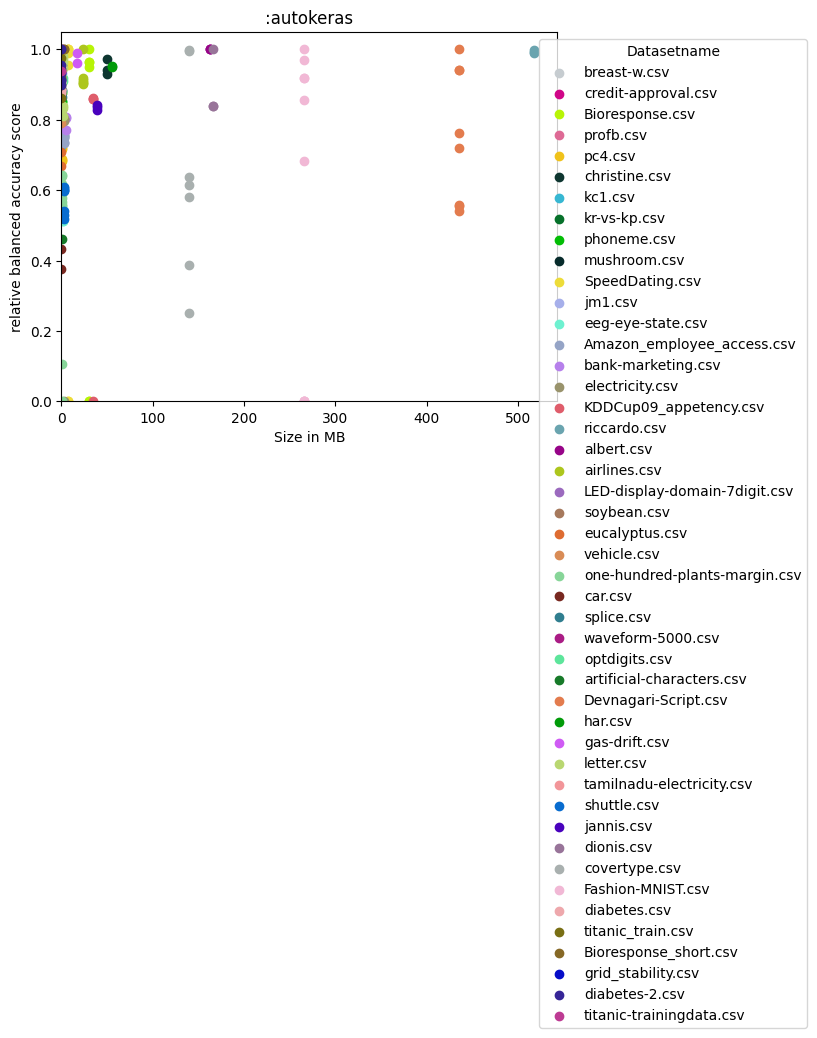

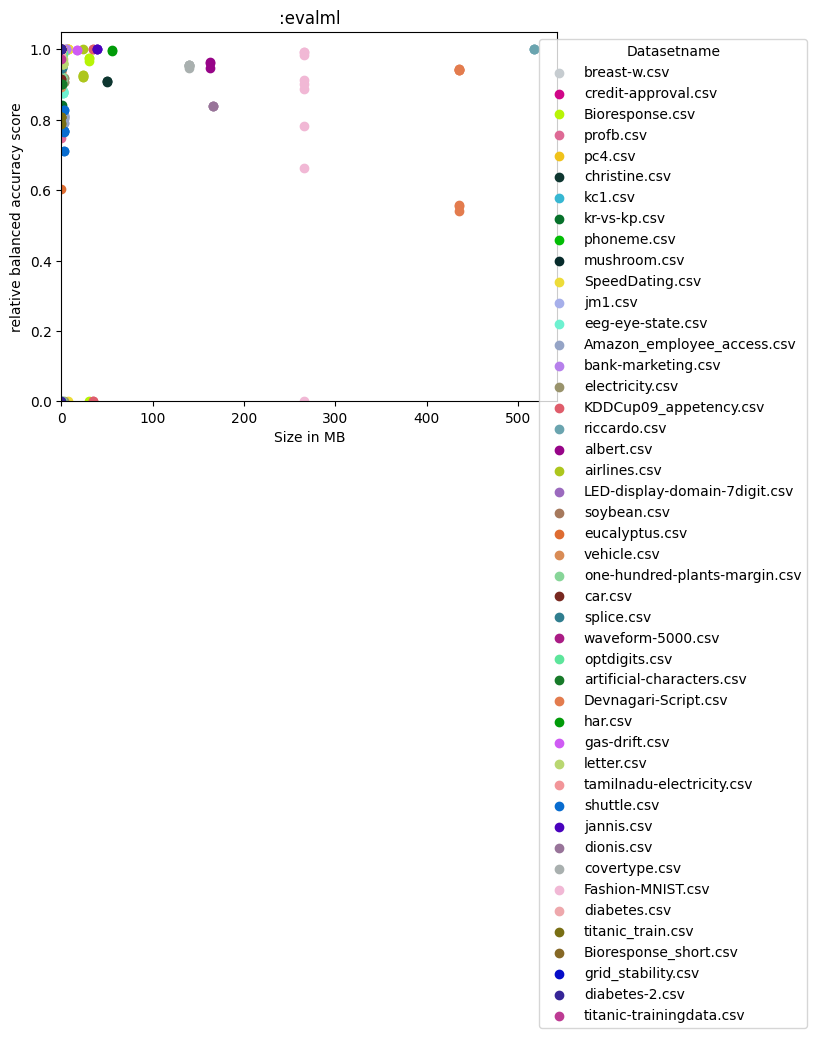

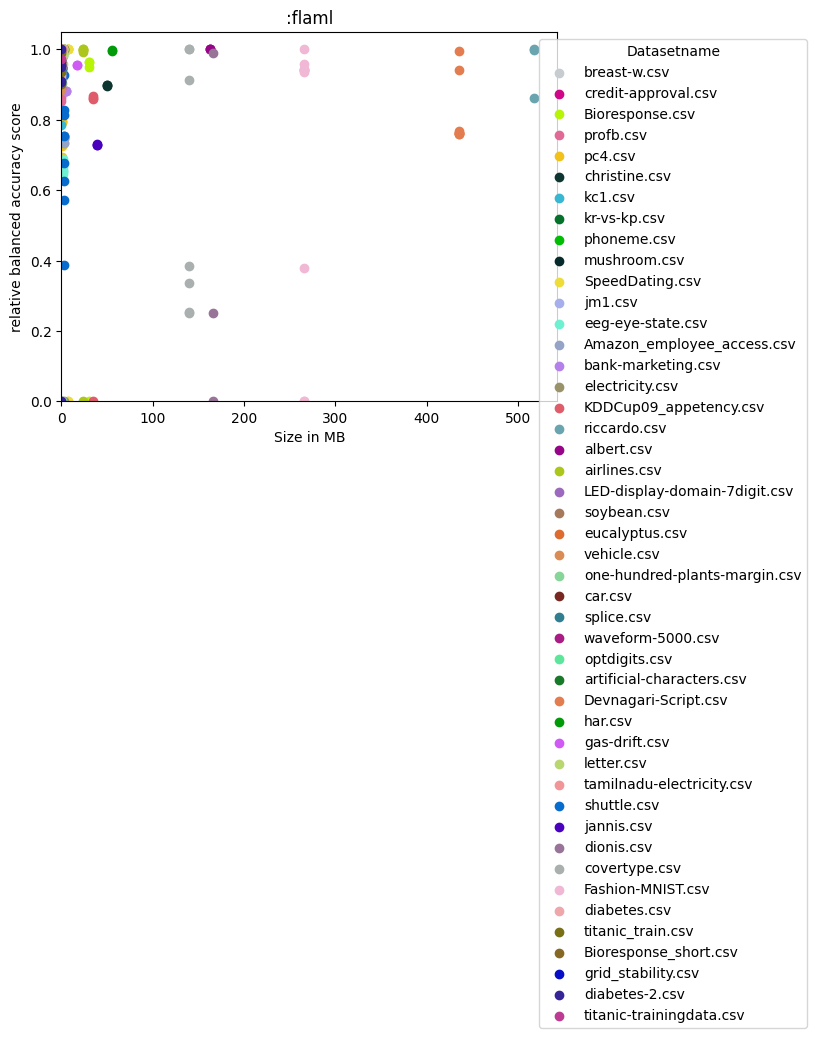

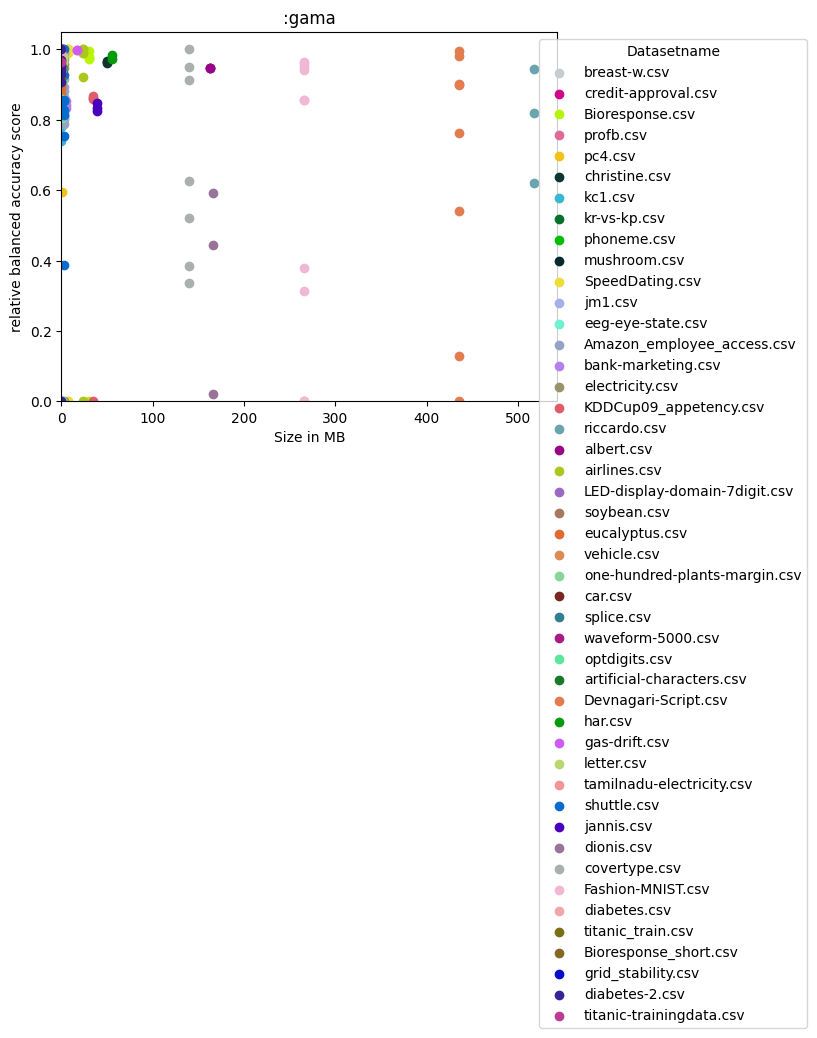

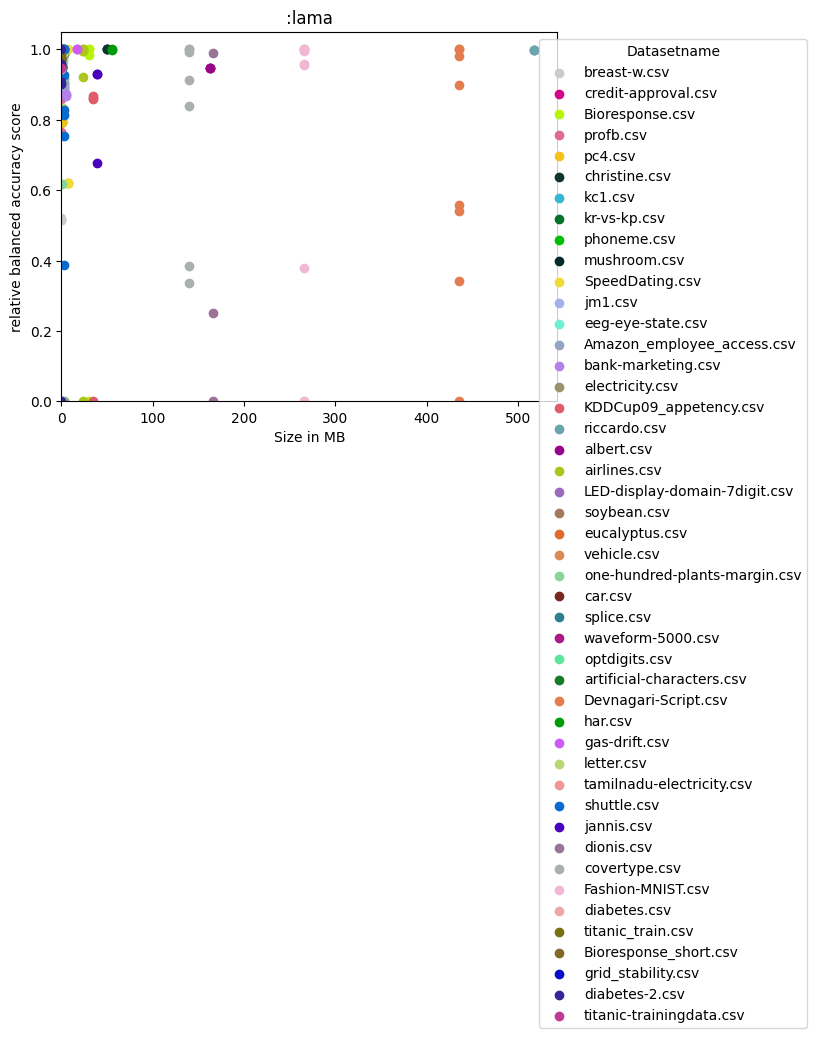

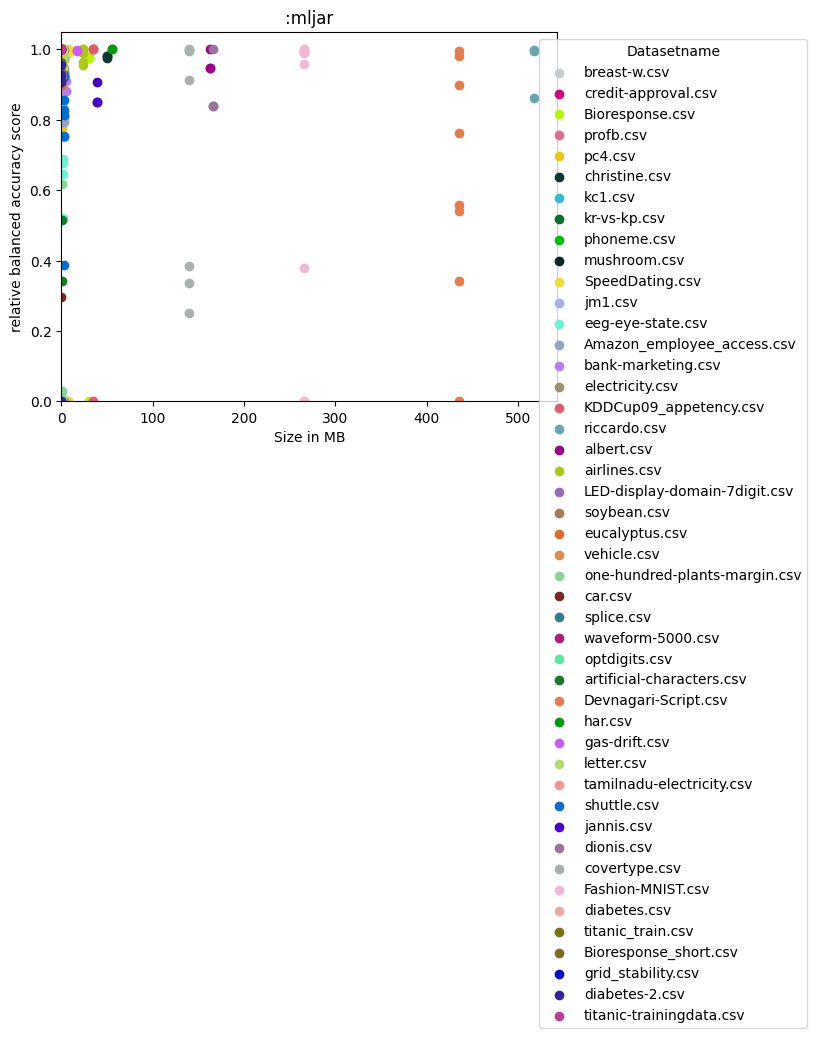

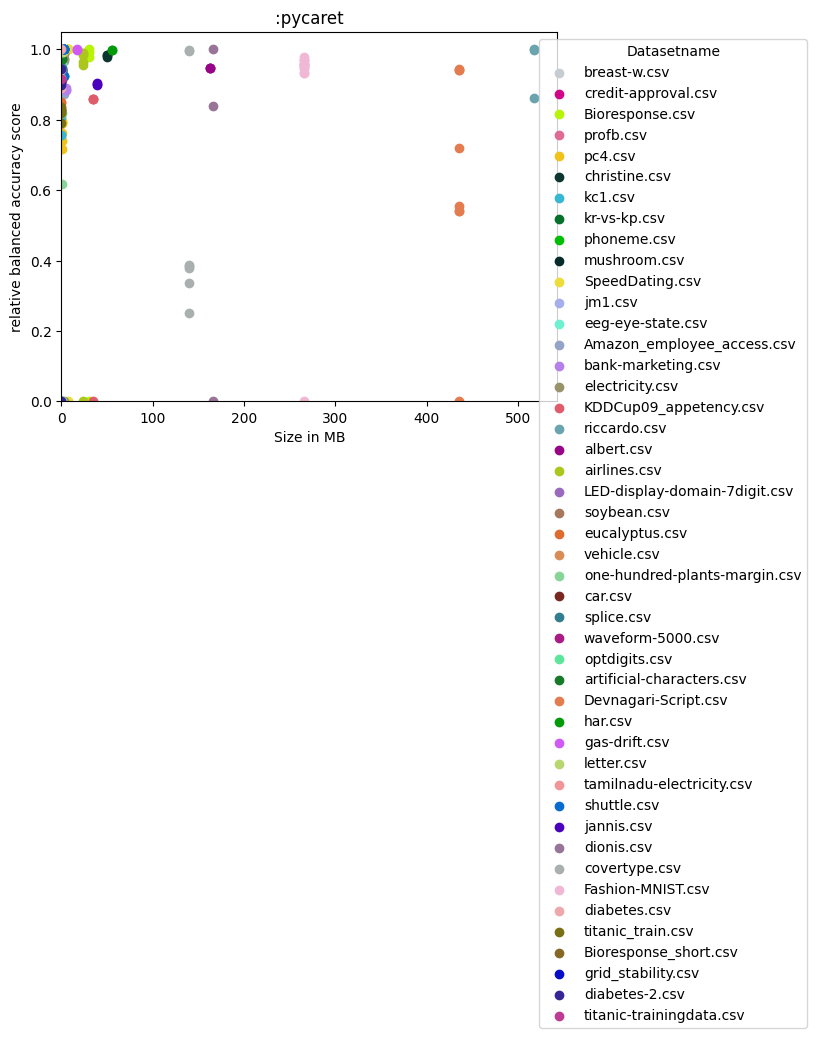

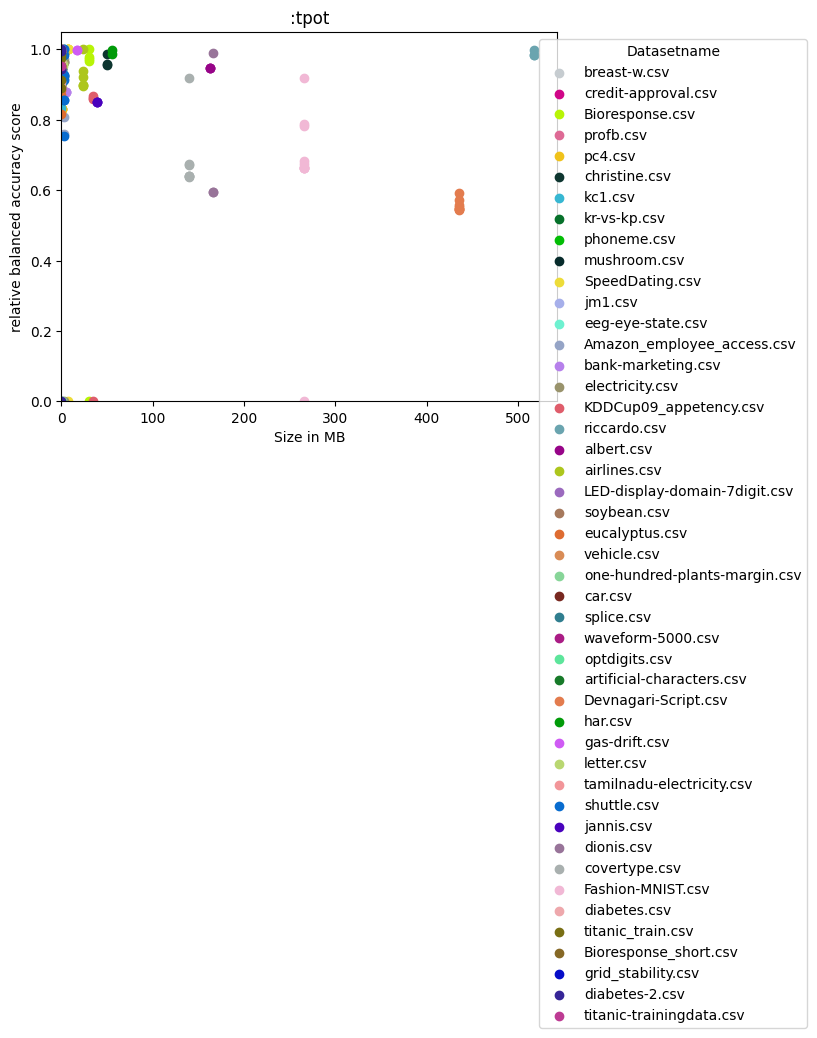

C:\Users\pfriehe\AppData\Local\Temp\ipykernel_24880\2206077629.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for automl in automls:


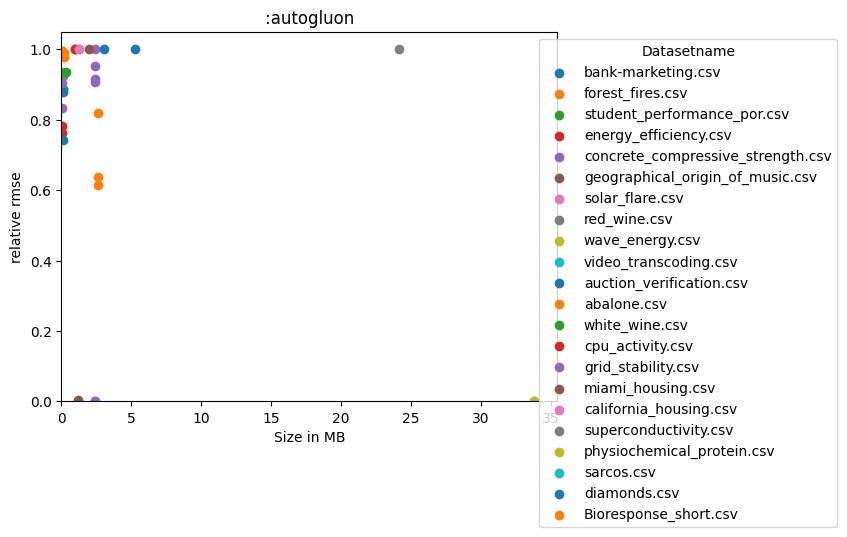

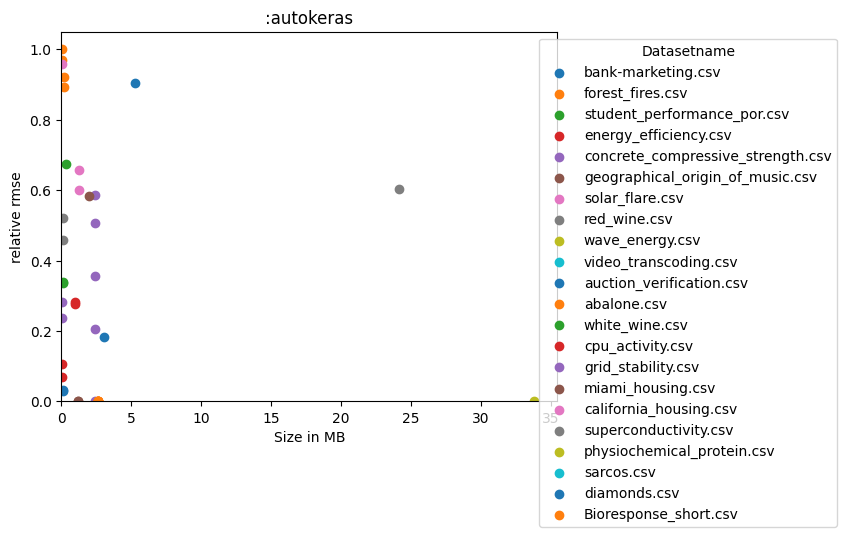

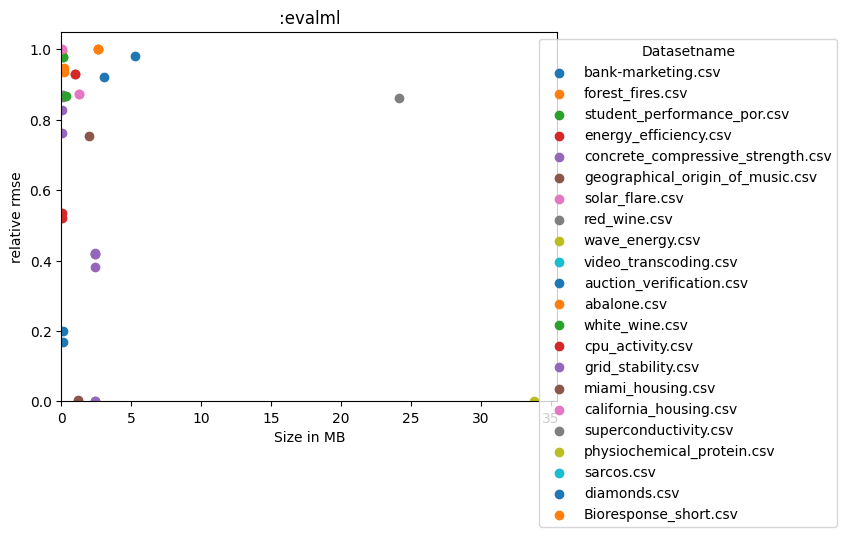

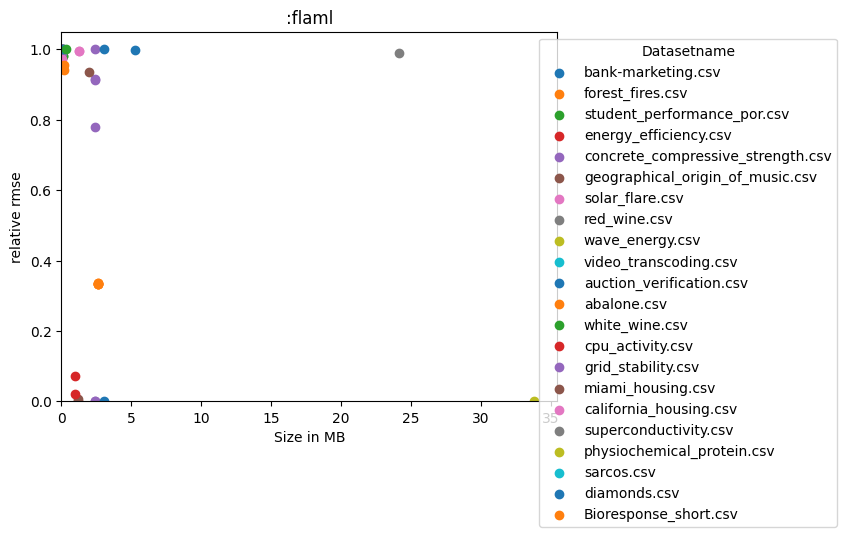

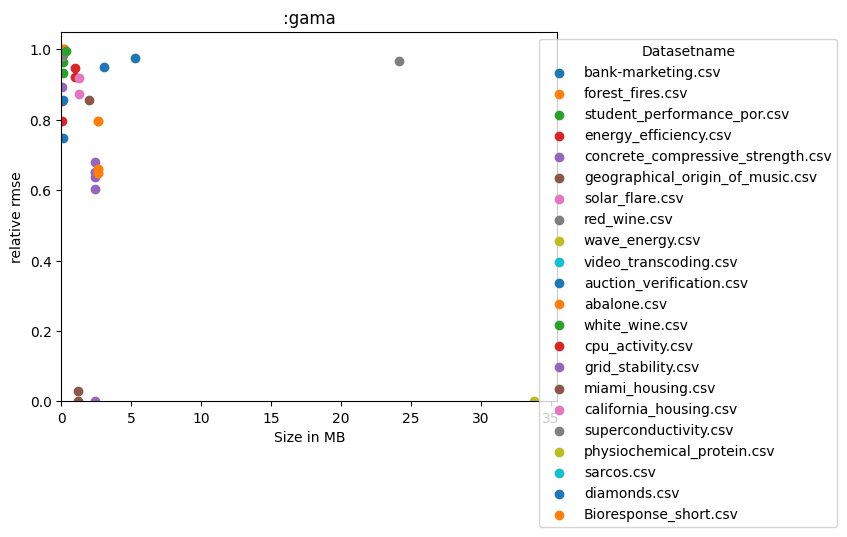

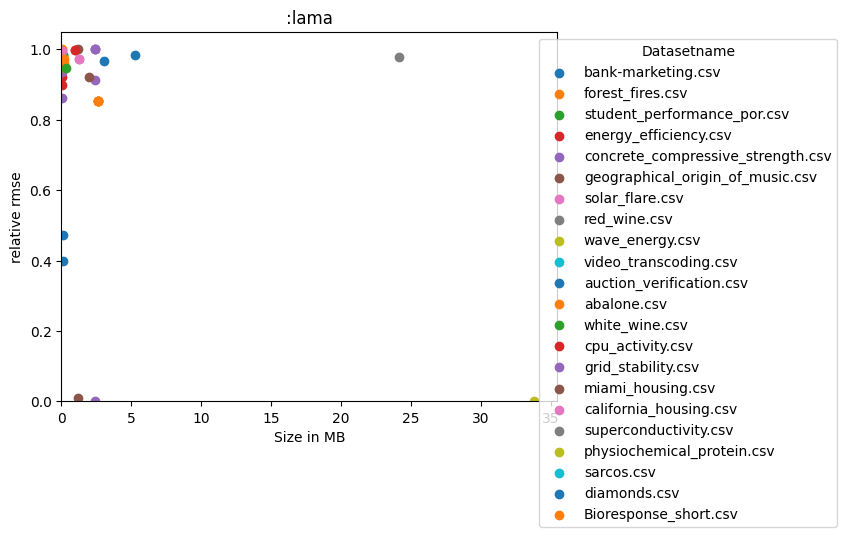

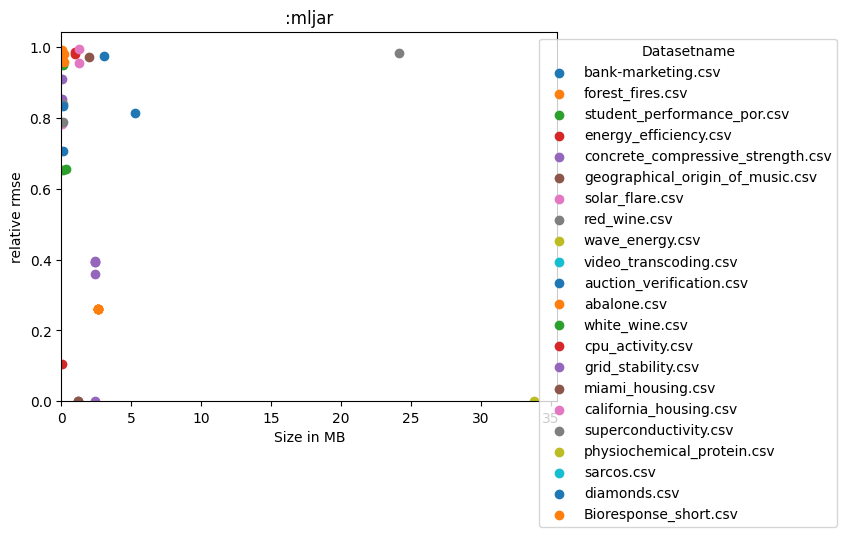

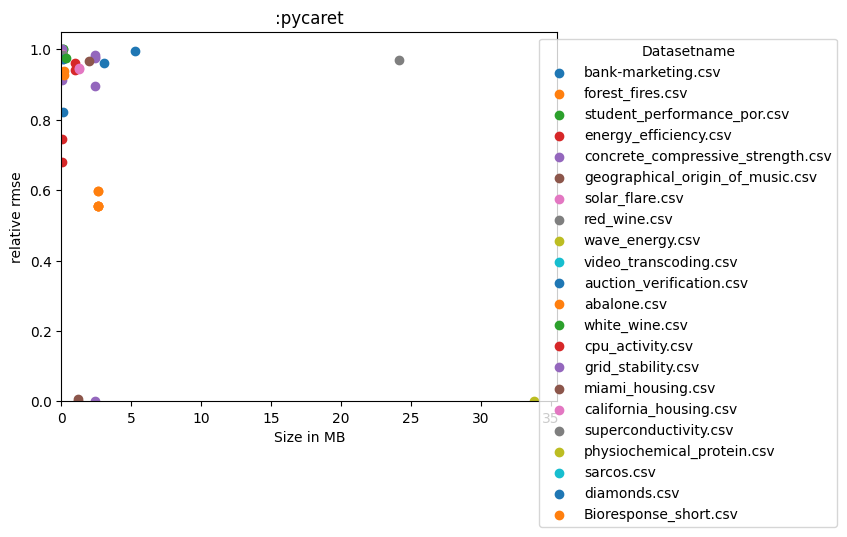

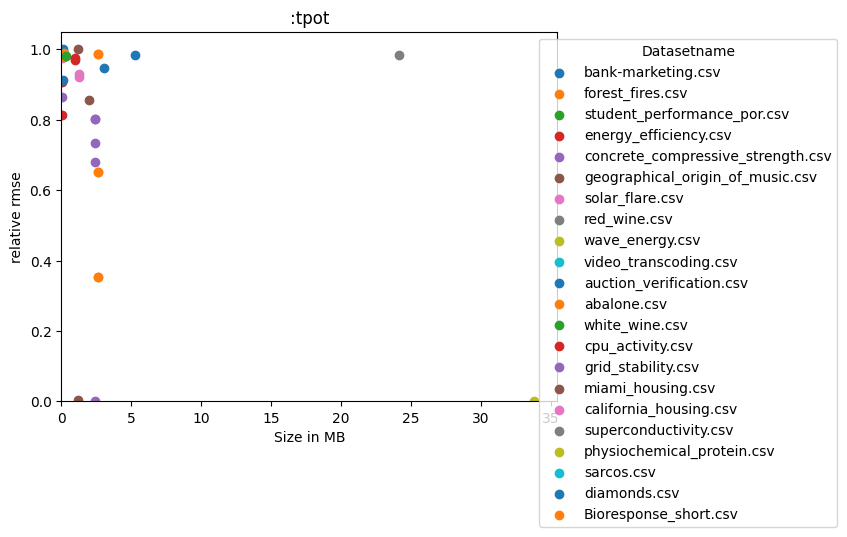

In [5]:
# create plots accuracy and size
for group in groups:
    automls = group[1].groupby(["AutoML_solution"])
    unique_names = group[1]["dataset_name"].unique()
    colors = np.random.rand(len(set(unique_names)), 3)
    for automl in automls:
        if automl[1]["task"].unique()[0] == ":tabular_classification":
            for i, name in enumerate(unique_names):
                data = automl[1][automl[1]["dataset_name"] == name]
                plt.scatter(data["dataset_size_in_mb"], data["relative_"+ measure_classification], label=name, color=colors[i])
            plot(automl[1]["AutoML_solution"].unique()[0],"Size in MB", "relative balanced accuracy score","Datasetname")
        else:
            for i, name in enumerate(unique_names):
                data = automl[1][automl[1]["dataset_name"] == name]
                plt.scatter(data["dataset_size_in_mb"], data["relative_" + measure_regression], label=name)
            plot(automl[1]["AutoML_solution"].unique()[0],"Size in MB", "relative rmse","Datasetname")


C:\Users\pfriehe\AppData\Local\Temp\ipykernel_24880\4141701561.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group in groups:
C:\Users\pfriehe\AppData\Local\Temp\ipykernel_24880\4141701561.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for automl in automls:


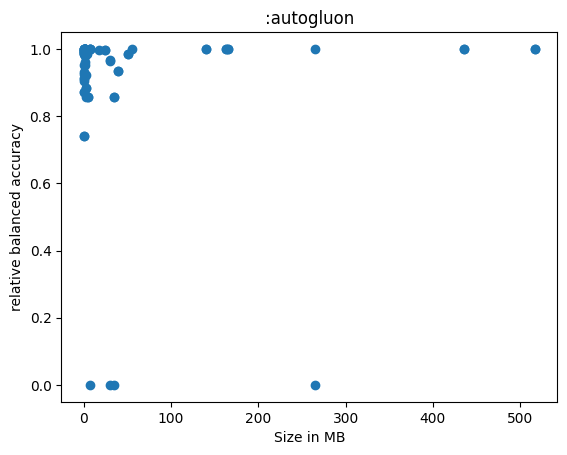

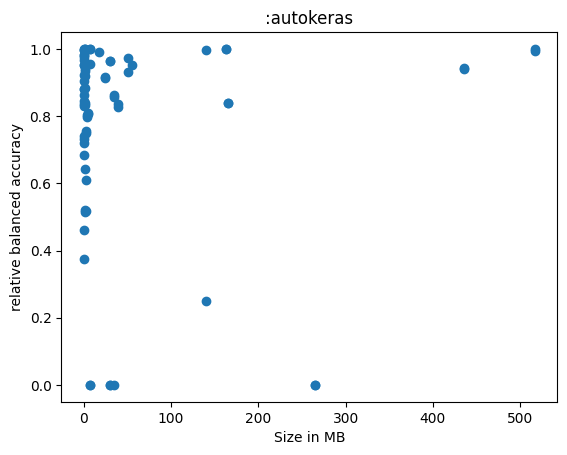

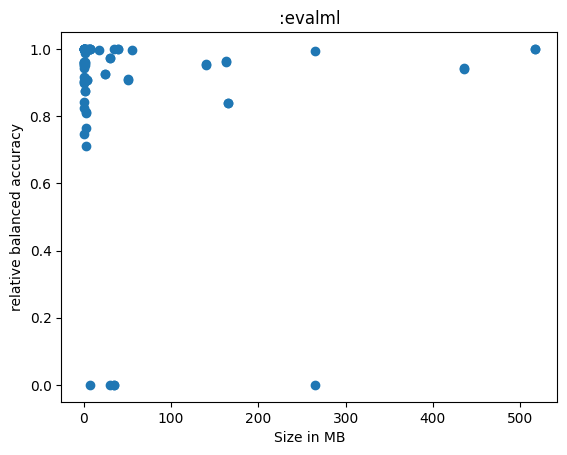

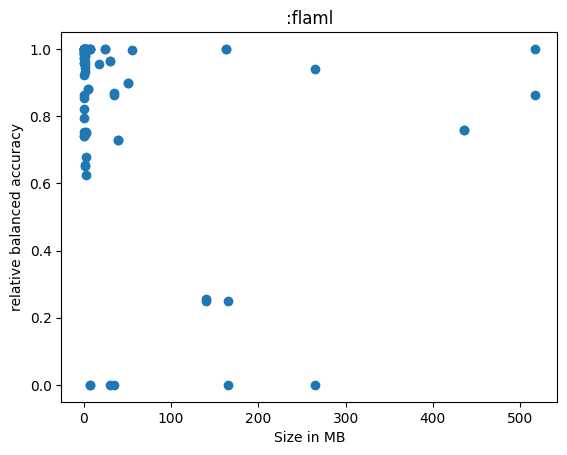

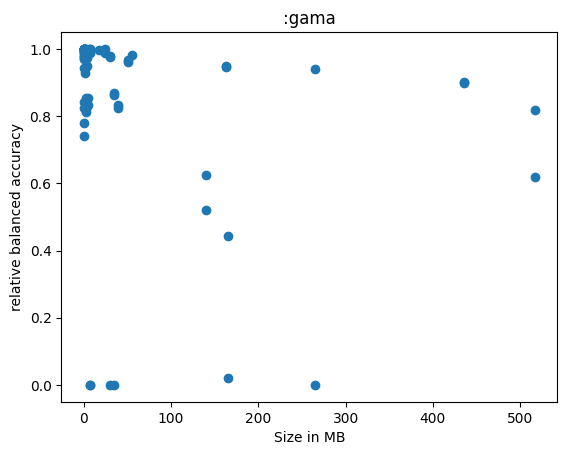

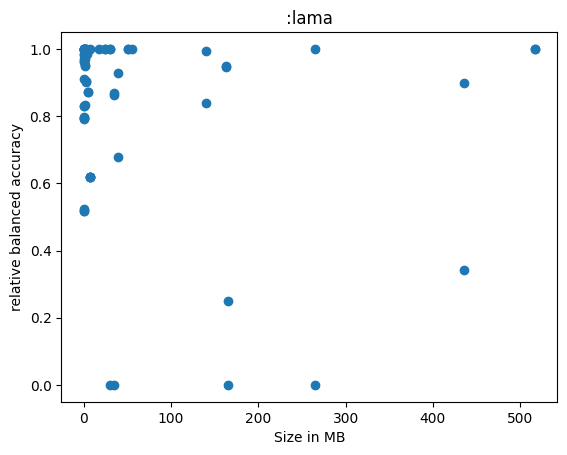

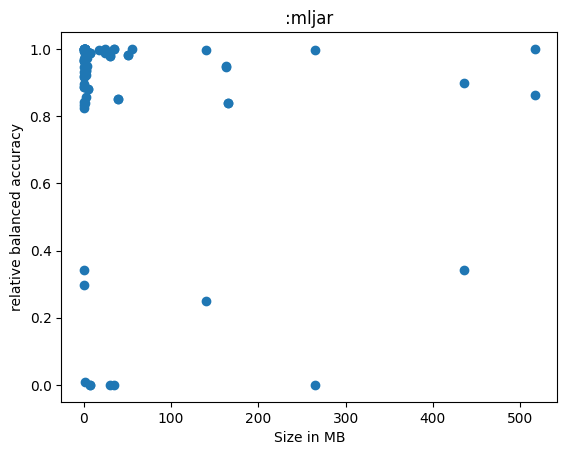

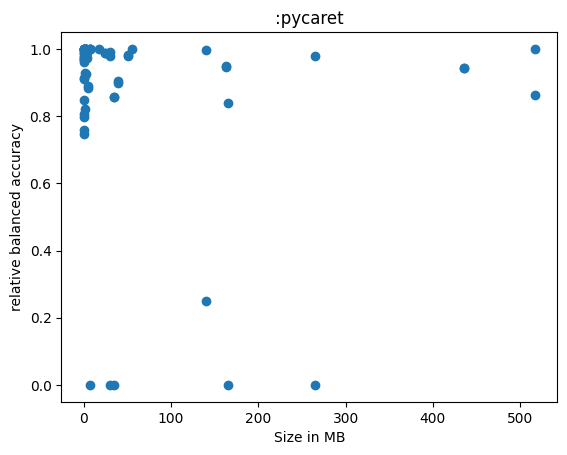

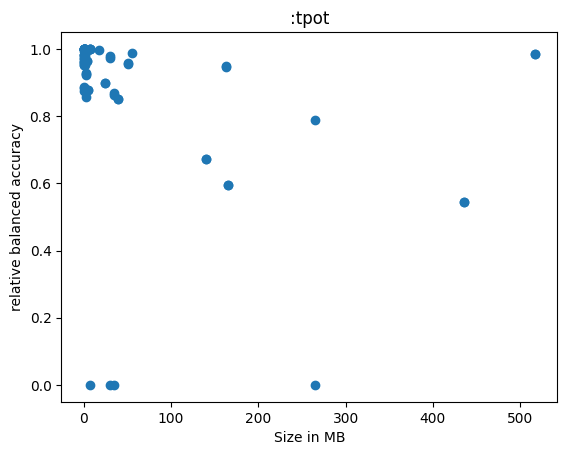

C:\Users\pfriehe\AppData\Local\Temp\ipykernel_24880\4141701561.py:6: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for automl in automls:


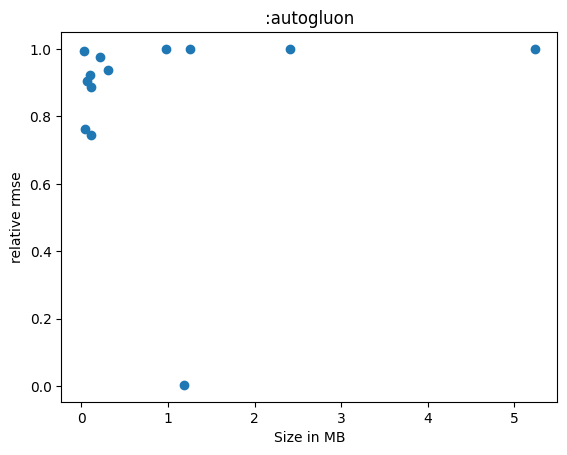

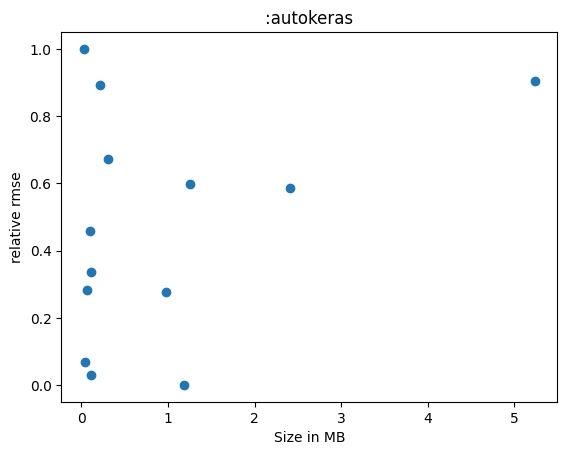

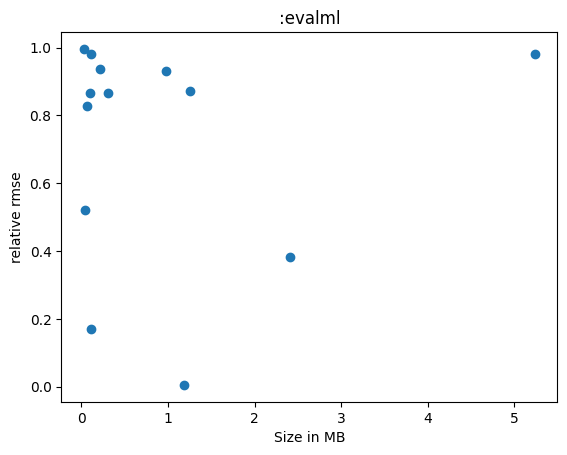

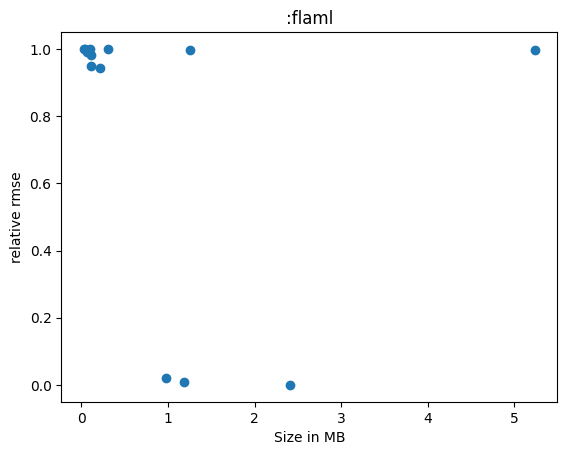

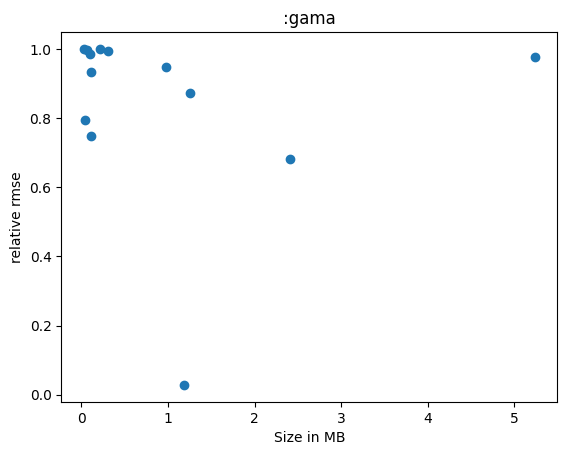

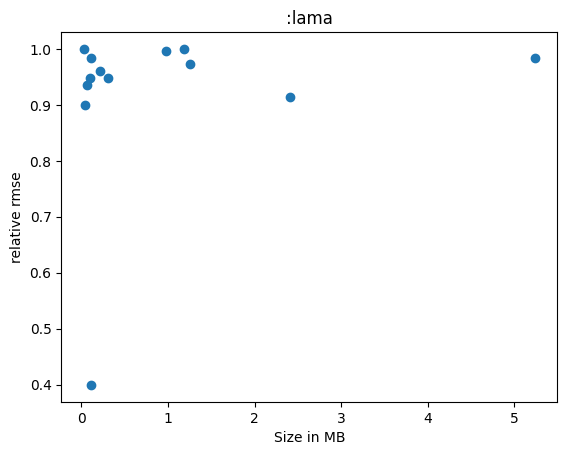

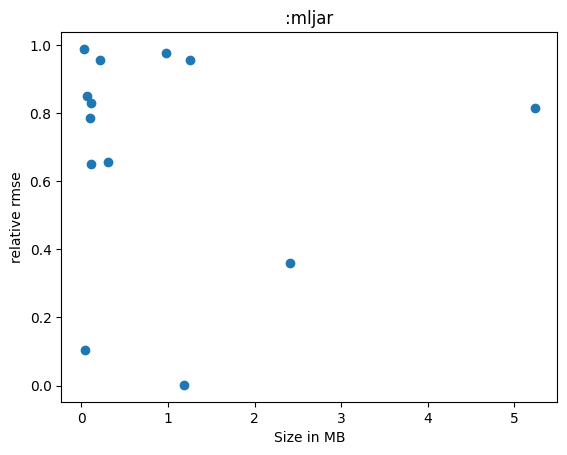

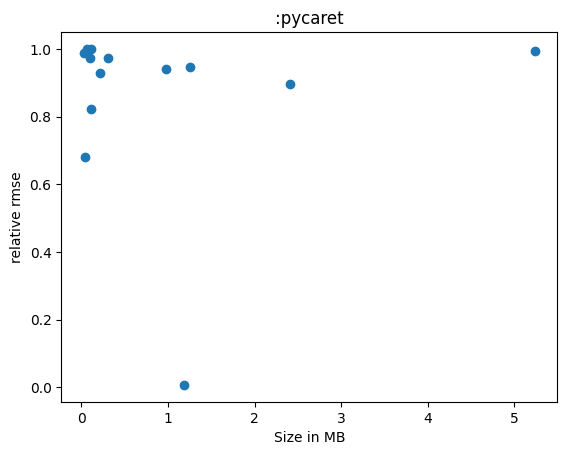

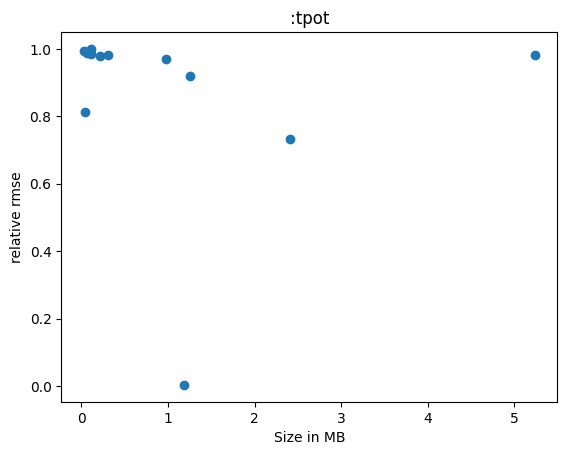

In [6]:
# create plots accuracy and size
for group in groups:
    automls = group[1].groupby(["AutoML_solution"])
    unique_names = group[1]["dataset_name"].unique()
    colors = np.random.rand(len(set(unique_names)), 3)
    for automl in automls:
        if automl[1]["task"].unique()[0] == ":tabular_classification":
            data = automl[1][automl[1]["runtime_limit"] == 60]
            plt.scatter(data["dataset_size_in_mb"], data["relative_"+ measure_classification])
            automl[1]["AutoML_solution"].unique()[0],"Size in MB", "relative balanced accuracy score","Datasetname"
            plt.xlabel("Size in MB")
            plt.ylabel("relative balanced accuracy")
            plt.title(automl[1]["AutoML_solution"].unique()[0])
            plt.show()
        else:
            data = automl[1][automl[1]["runtime_limit"] == 60]
            plt.scatter(data["dataset_size_in_mb"], data["relative_" + measure_regression])
            plt.xlabel("Size in MB")
            plt.ylabel("relative rmse")
            plt.title(automl[1]["AutoML_solution"].unique()[0])
            plt.show()


This section is for generating a plot for each task to plot the size in combination with the best runtime limit for each dataset
Also it plots the linear regession for the calculated parameters for the runtime prediction

C:\Users\pfriehe\AppData\Local\Temp\ipykernel_24880\3212750215.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group in runtime_groups:


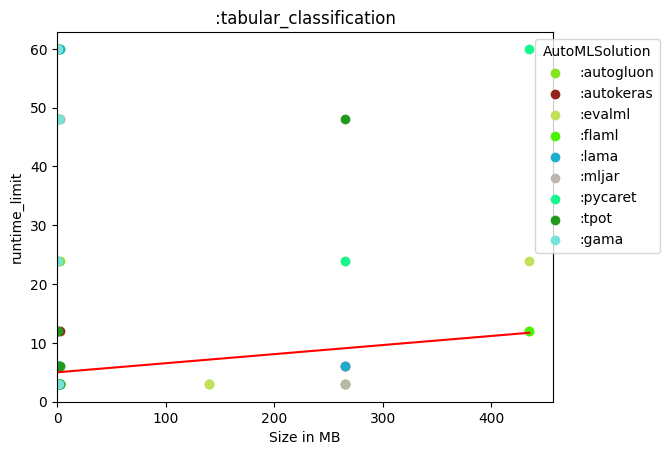

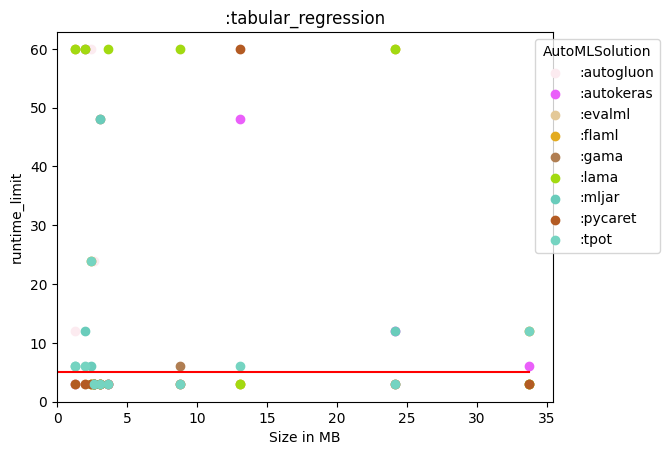

In [11]:
for group in runtime_groups:
    unique_names = group[1]["AutoML_solution"].unique()
    colors = np.random.rand(len(set(unique_names)), 3)
    task = group[1]["task"].unique()[0][2:-2]
    for i, name in enumerate(unique_names):
        data = group[1][group[1]["AutoML_solution"] == name]
        plt.scatter(data["dataset_size_in_mb"], data["best_runtime_limit"], label=name, color=colors[i])
    x_data = np.linspace(0, group[1]["dataset_size_in_mb"].max() , 100)
    y_line = [parameter[task]["m"]* x + parameter[task]["b"] for x in x_data]
    plt.plot(x_data, y_line, color = "red")
    plot(task,"Size in MB","runtime_limit", "AutoMLSolution" )

This section is for generating a plot for each task and each automlsolution to plot the size in combination with the best runtime limit for each dataset

C:\Users\pfriehe\AppData\Local\Temp\ipykernel_24880\2216835767.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group in runtime_groups:
C:\Users\pfriehe\AppData\Local\Temp\ipykernel_24880\2216835767.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for automl in automls:


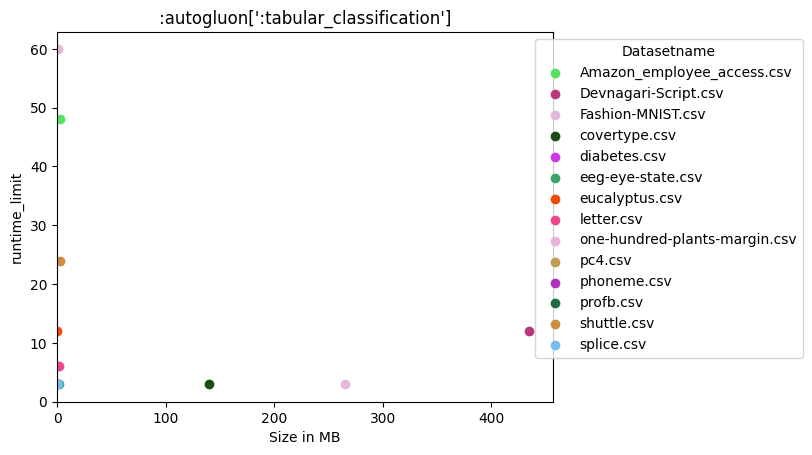

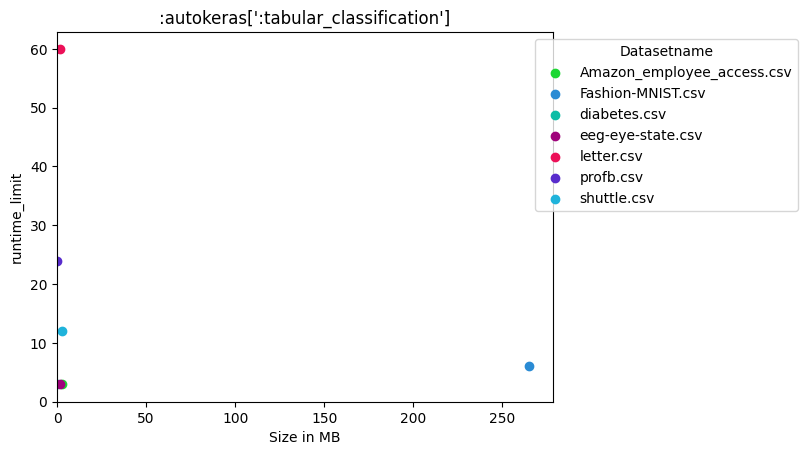

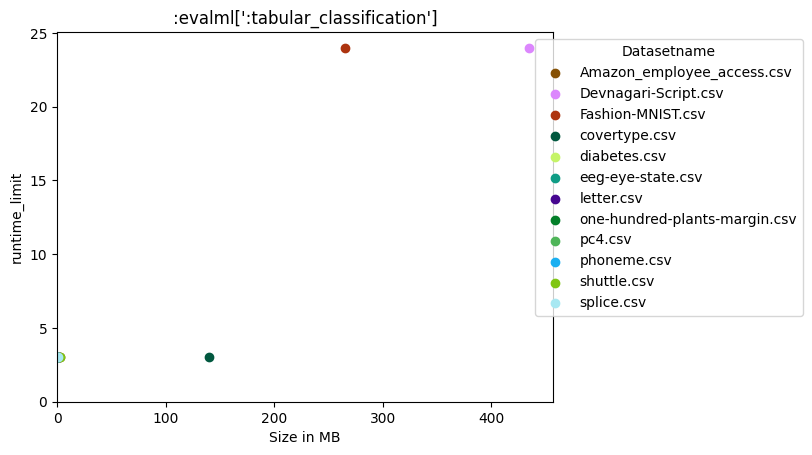

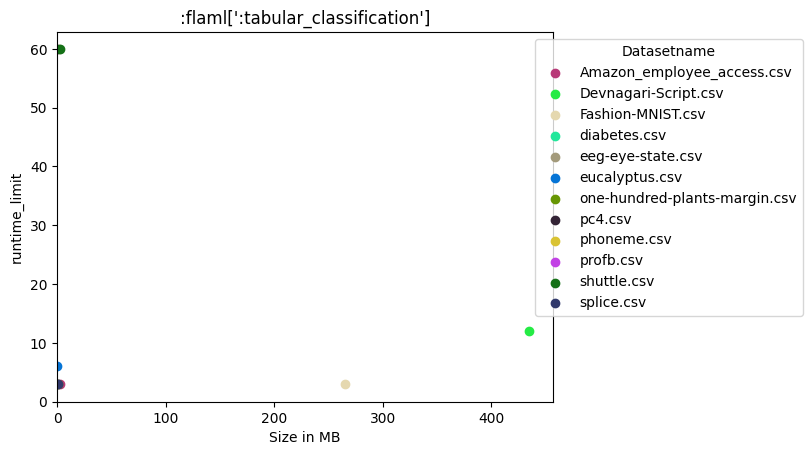

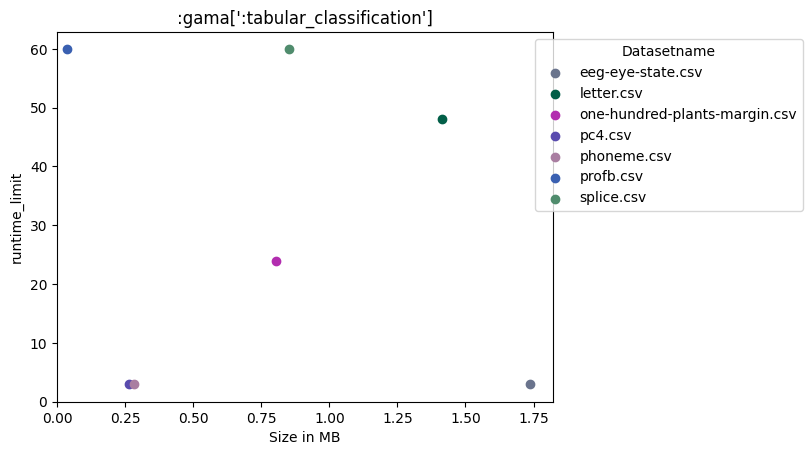

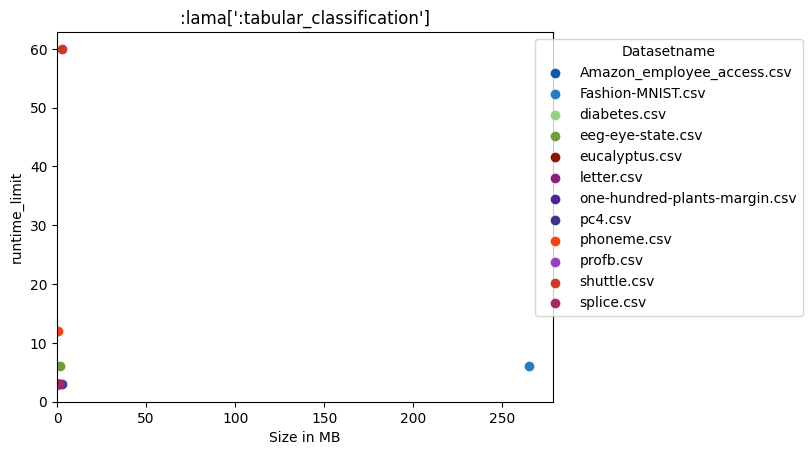

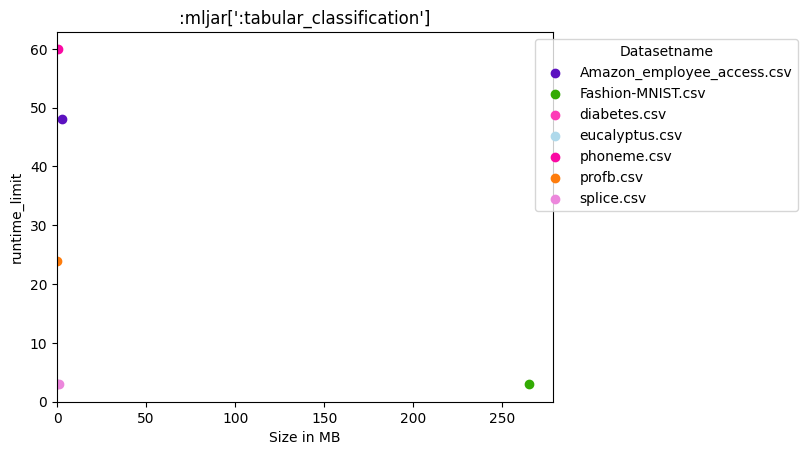

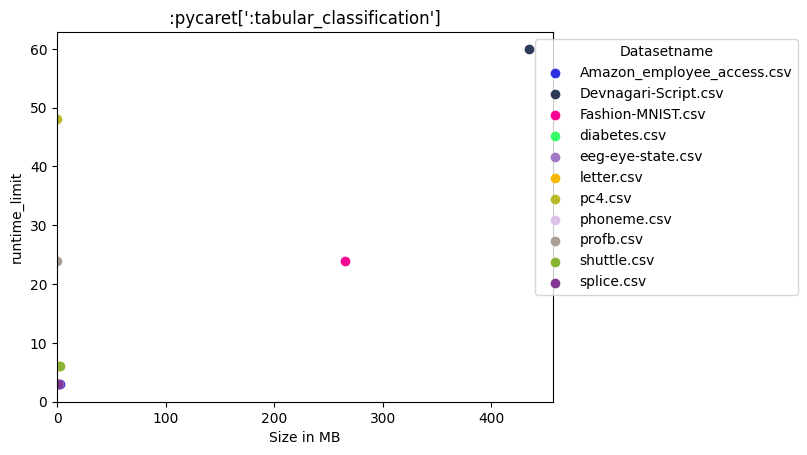

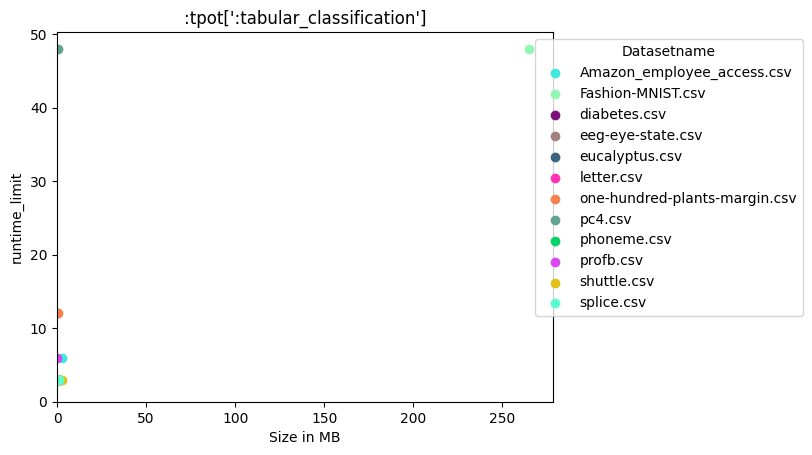

C:\Users\pfriehe\AppData\Local\Temp\ipykernel_24880\2216835767.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for automl in automls:


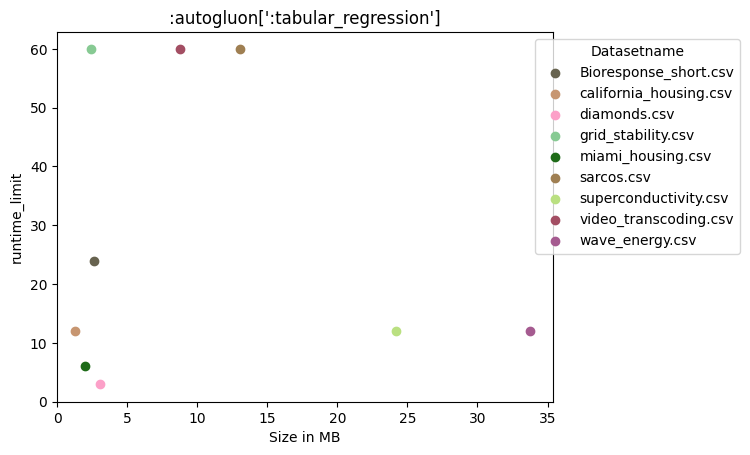

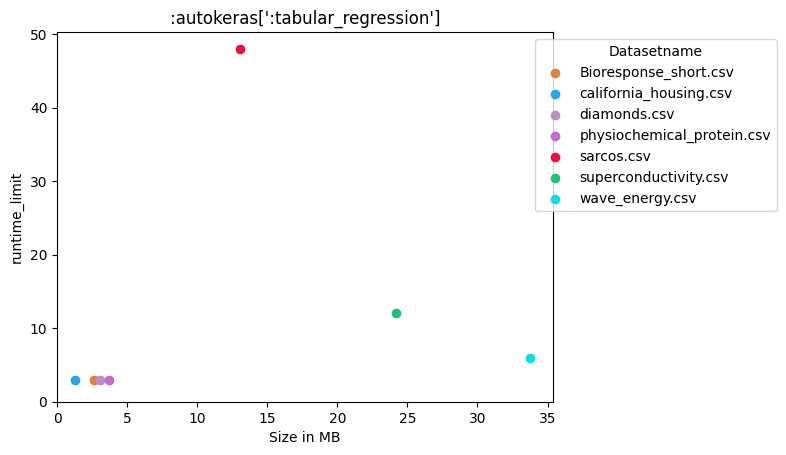

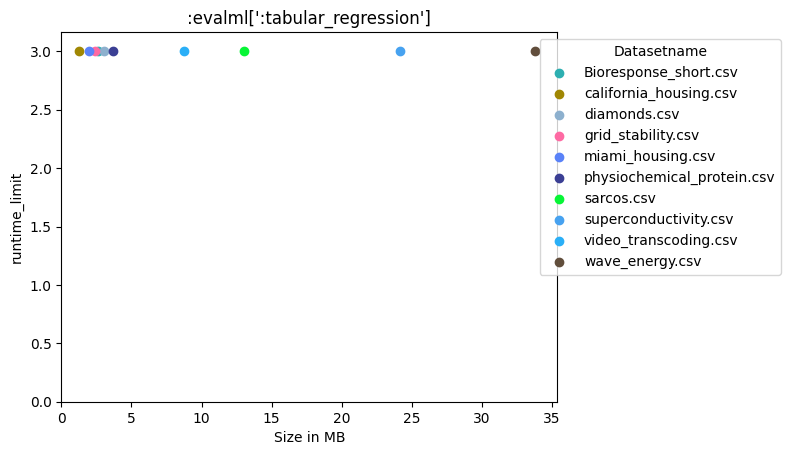

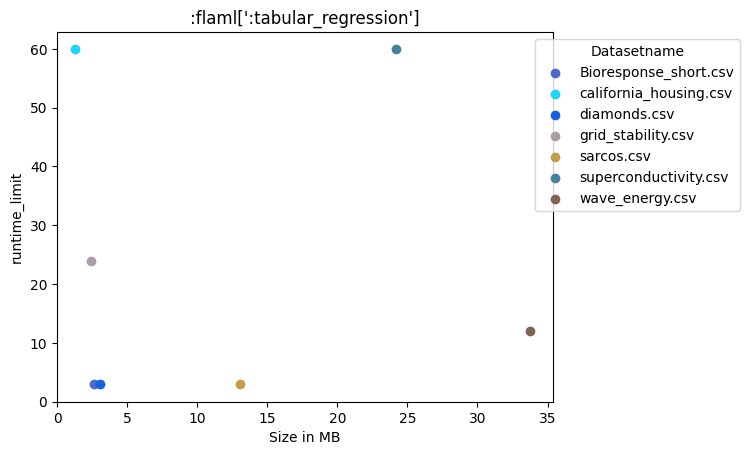

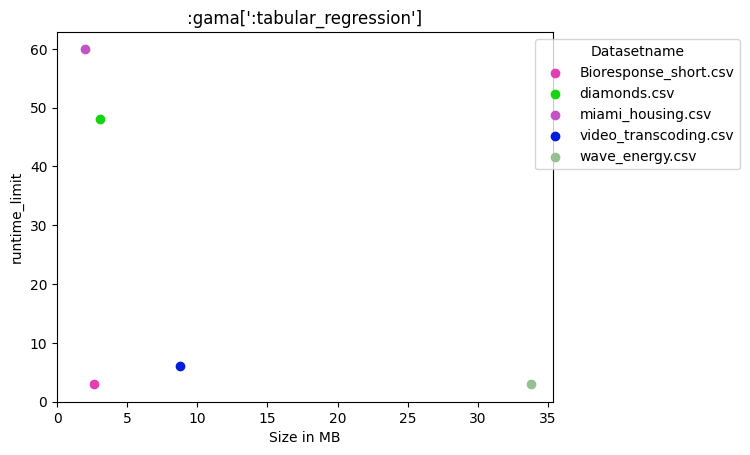

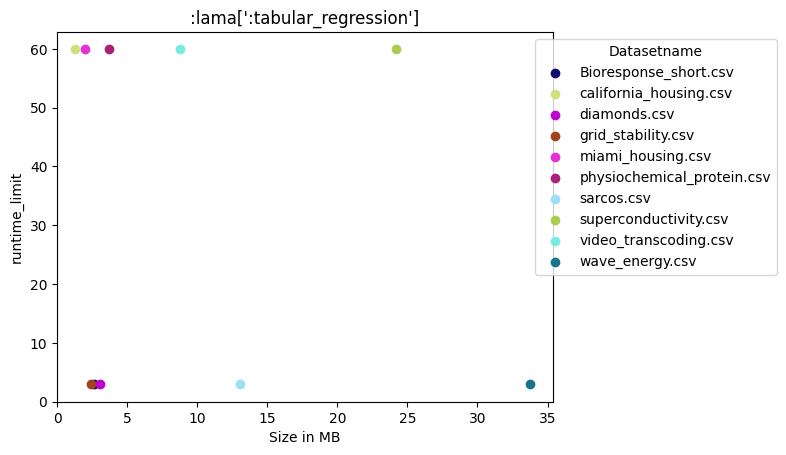

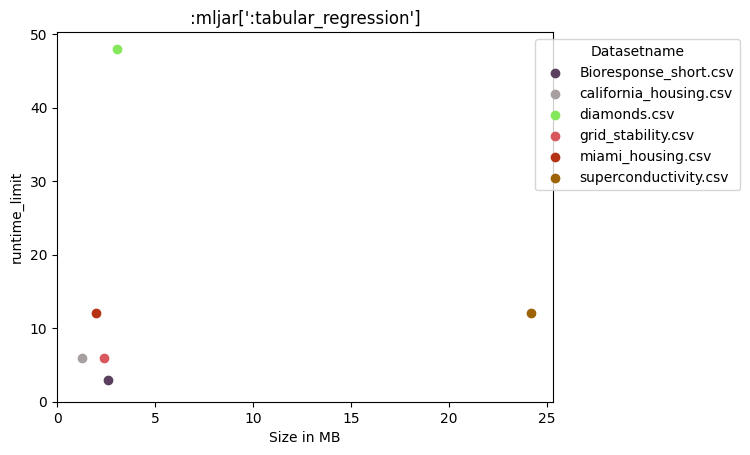

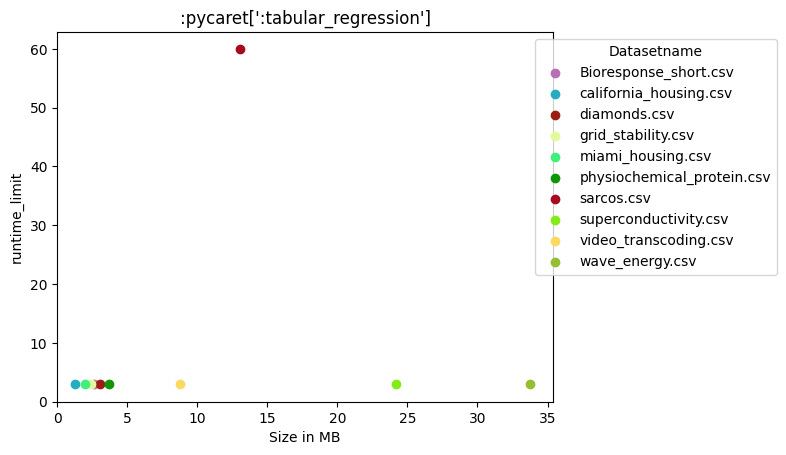

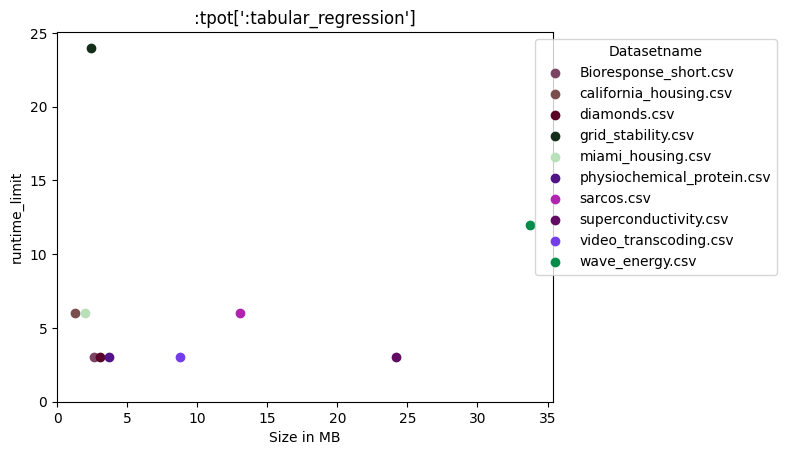

In [8]:

for group in runtime_groups:
    automls = group[1].groupby(["AutoML_solution"])
    for automl in automls:
        unique_names = automl[1]["dataset_name"].unique()
        colors = np.random.rand(len(set(unique_names)), 3)
        for i, name in enumerate(unique_names):
            data = automl[1][automl[1]["dataset_name"] == name]
            plt.scatter(data["dataset_size_in_mb"], data["best_runtime_limit"], label=name, color=colors[i])
        plot(automl[1]["AutoML_solution"].unique()[0] + automl[1]["task"].unique()[0],"Size in MB","runtime_limit", "Datasetname" )

In [12]:
for group in groups:
    automls = group[1].groupby(["AutoML_solution"])
    unique_names = group[1]["dataset_name"].unique()
    colors = np.random.rand(len(set(unique_names)), 3)
    for automl in automls:
        if automl[1]["task"].unique()[0] == ":tabular_classification":
            data = automl[1][automl[1]["runtime_limit"] == 60]
            print(":tabular_classification")
            print(automl[1]["AutoML_solution"].unique()[0])
            bin1 = data[data["dataset_size_in_mb"]< 100]
            bin2 = data[data["dataset_size_in_mb"]>= 100]
            mean_bin_1 = bin1["relative_" + measure_classification].mean()
            mean_bin_2 = bin2["relative_" + measure_classification].mean()
            print(mean_bin_1)
            print(mean_bin_2)
        else:
            data = automl[1][automl[1]["runtime_limit"] == 60]
            print(":tabular_regression")
            print(automl[1]["AutoML_solution"].unique()[0])
            mean = data["relative_" + measure_regression].mean()
            print(mean)

:tabular_classification
:autogluon
0.9090262006146829
0.9166534674375016
:tabular_classification
:autokeras
0.7825007888615845
0.7332021959590684
:tabular_classification
:evalml
0.8832029977954919
0.865530564563902
:tabular_classification
:flaml
0.8510541689849139
0.5896930638972566
:tabular_classification
:gama
0.8886389864386525
0.6403306020112544
:tabular_classification
:lama
0.8727418053996094
0.6846399814088845
:tabular_classification
:mljar
0.856122806550209
0.7431113340838383
:tabular_classification
:pycaret
0.909035972396006
0.7255773495395018
:tabular_classification
:tpot
0.9123343158828603
0.6899404053978514
:tabular_regression
:autogluon
0.8565232035940293
:tabular_regression
:autokeras
0.4699909184692679
:tabular_regression
:evalml
0.7179950537487362
:tabular_regression
:flaml
0.7604140597565592
:tabular_regression
:gama
0.8429183936143444
:tabular_regression
:lama
0.9184164029548548
:tabular_regression
:mljar
0.6874830700737131
:tabular_regression
:pycaret
0.85758183638819

C:\Users\pfriehe\AppData\Local\Temp\ipykernel_24880\1560446706.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group in groups:
C:\Users\pfriehe\AppData\Local\Temp\ipykernel_24880\1560446706.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for automl in automls:
C:\Users\pfriehe\AppData\Local\Temp\ipykernel_24880\1560446706.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for automl in automls:
